In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
ts = pd.read_csv("get_data/flights.csv")

# prep
ts["date"] = pd.to_datetime(
    ts["year"].astype(str) + "-" + ts["month"].astype(str) + "-01"
)
ts["n"] = ts["passengers"]

import ta

ts["n_lag1"] = ts["n"].shift(1)
ts["n_lag3"] = ts["n"].shift(3)
ts["n_lag12"] = ts["n"].shift(12)
ts["ma12"] = ta.trend.sma_indicator(ts["n"], window=12, fillna=True)

ts.drop(columns=["year", "month"], inplace=True)

print(ts.head().to_string())
ts.shape

   passengers       date    n  n_lag1  n_lag3  n_lag12        ma12
0         112 1949-01-01  112     NaN     NaN      NaN  112.000000
1         118 1949-02-01  118   112.0     NaN      NaN  115.000000
2         132 1949-03-01  132   118.0     NaN      NaN  120.666667
3         129 1949-04-01  129   132.0   112.0      NaN  122.750000
4         121 1949-05-01  121   129.0   118.0      NaN  122.400000


(144, 7)

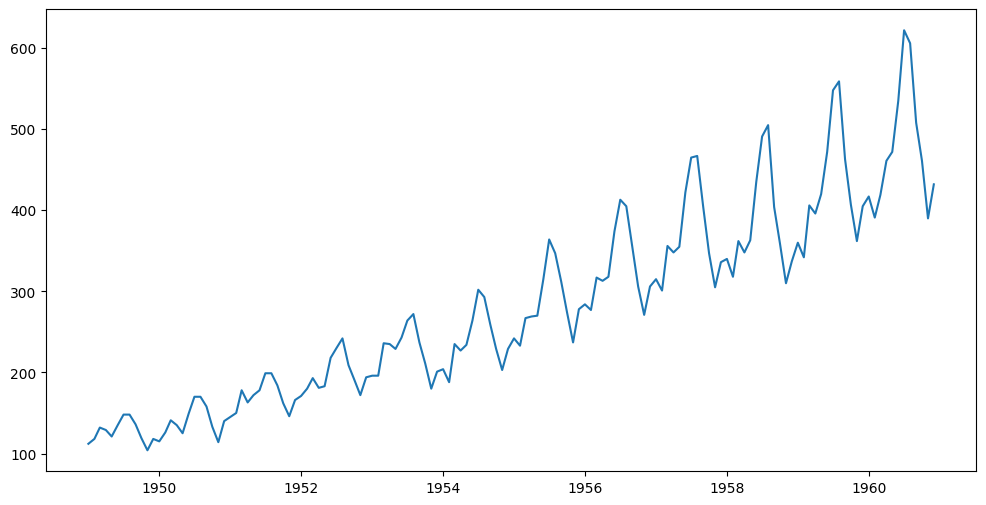

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ts["date"], ts["n"])

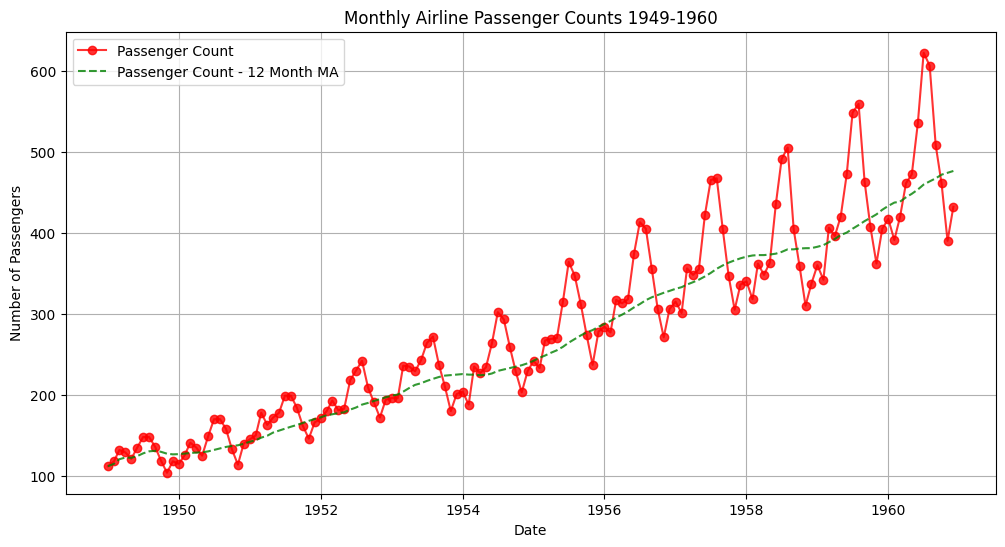

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    ts["date"], ts["n"], alpha=0.8, marker="o", color="red", label="Passenger Count"
)
ax.plot(
    ts["date"],
    ts["ma12"],
    alpha=0.8,
    color="green",
    linestyle="--",
    label="Passenger Count - 12 Month MA",
)
ax.set_title("Monthly Airline Passenger Counts 1949-1960")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Passengers")
ax.legend()
ax.grid()
plt.close()
fig 